In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
# Upload the data
# data will contain everything, names and locations
# df will contain the features used in the modeling
data = pd.read_csv('../data/processed/DecisionTreeData2010.csv', index_col=0)
#data = data.loc[data.Year > 2009]
data.sort_index(inplace=True)
data.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,Cost,PREDDEG_N,CONTROL_N,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins,Complete,RetentionFT,RetentionPT
0,00100200,alabama a & m university,Normal,1,3,4,1,5.0,0.5129,4930.0,...,13762.0,Bachelor,Public,xl,high,high,high,0.3306,0.7457,0.5000
1,00105200,university of alabama at birmingham,Birmingham,1,3,4,1,5.0,0.8243,10661.0,...,18003.0,Bachelor,Public,xl,high,highest,highest,0.4108,0.7997,0.7000
2,02503400,amridge university,Montgomery,1,3,4,2,5.0,0.7143,370.0,...,20700.0,Bachelor,Private nonprofit,medium,highest,med,low,0.2308,0.8000,NaN
3,00105500,university of alabama at huntsville,Huntsville,1,3,4,1,5.0,0.6614,5828.0,...,17064.0,Bachelor,Public,xl,high,high,highest,0.4364,0.7545,0.5385
4,00100500,alabama state university,Montgomery,1,3,4,1,5.0,0.4372,4882.0,...,14390.0,Bachelor,Public,xl,high,high,high,0.2399,0.6352,0.4167


In [3]:
identity = data[['OPEID','INSTNM', 'CITY']]
identity.shape

(30682, 3)

In [4]:
# Separate open and closed schoools
closed = data.loc[data.CURROPER == False]
closed.shape

(2759, 33)

In [5]:
closed_degree = closed.pivot_table(index='PREDDEG_N', columns=['CONTROL'], aggfunc='size')
print(closed_degree)

CONTROL           1    2     3
PREDDEG_N                     
Associates       42   26   257
Bachelor         13   94   134
Certificate     117  147  1577
Graduate          1   40    58
Not classified   27   35   191


In [98]:
closed.PREDDEG_N.value_counts()

Certificate       1841
Associates         325
Not classified     253
Bachelor           241
Graduate            99
Name: PREDDEG_N, dtype: int64

In [6]:
# Resample the minority class
from sklearn.utils import resample
closed_upsample = resample(closed, replace=True, n_samples=closed.shape[0]*2, random_state=123)

In [7]:
open_df = data.loc[data.CURROPER==True]
open_df.shape

(27923, 33)

In [8]:
current = open_df.loc[data.Year > 2012]
current.shape

(7440, 33)

In [93]:
current_degree = current.pivot_table(index='PREDDEG_N', columns=['CONTROL','CURROPER'], aggfunc='size')
print(current_degree)

CONTROL           1     2     3
CURROPER       True  True  True
PREDDEG_N                      
Associates      780   163   545
Bachelor        588  1241   271
Certificate     594   199  2300
Graduate         15   236    35
Not classified   75    89   309


In [96]:
current.PREDDEG_N.value_counts()

Certificate       3093
Bachelor          2100
Associates        1488
Not classified     473
Graduate           286
Name: PREDDEG_N, dtype: int64

In [10]:
data = pd.concat([current, closed_upsample], axis = 0)
data.shape

(12958, 33)

In [11]:
data.CURROPER.value_counts()

True     7440
False    5518
Name: CURROPER, dtype: int64

In [12]:
data.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,Cost,PREDDEG_N,CONTROL_N,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins,Complete,RetentionFT,RetentionPT
22882,00100200,alabama a & m university,Normal,1,3,4,1,5.0,0.8989,4051.0,...,18888.0,Bachelor,Public,xl,high,high,high,0.2914,0.6314,0.5000
22883,00105200,university of alabama at birmingham,Birmingham,1,3,4,1,5.0,0.8673,11200.0,...,19990.0,Bachelor,Public,xl,high,highest,highest,0.5377,0.8016,0.5000
22884,02503400,amridge university,Montgomery,1,3,4,2,5.0,NaN,322.0,...,12300.0,Bachelor,Private nonprofit,medium,highest,med,low,0.6667,0.3750,0.3333
22885,Other,university of alabama in huntsville,Huntsville,1,3,4,1,5.0,0.8062,5525.0,...,20306.0,Bachelor,Public,xl,high,high,highest,0.4835,0.8098,0.4444
22886,00100500,alabama state university,Montgomery,1,3,4,1,5.0,0.5125,5354.0,...,17400.0,Bachelor,Public,xl,high,high,high,0.2517,0.6219,0.3023


## Simple EDA with the data subset used for modeling

In [13]:
data['PREDDEG_N'].value_counts()

Certificate       6762
Bachelor          2594
Associates        2126
Not classified     979
Graduate           497
Name: PREDDEG_N, dtype: int64

In [14]:
print(data.CONTROL_N.value_counts())
#print(data.Governance.value_counts())

Private for-profit    7844
Private nonprofit     2646
Public                2468
Name: CONTROL_N, dtype: int64


In [15]:
control_degree = data.pivot_table(index='PREDDEG_N', columns=['CONTROL','CURROPER'], aggfunc='size')
print(control_degree)
#sns.heatmap(control_degree, cmap='YlGnBu')
#plt.savefig('../figures/PreddegControlHeatmap.png',bbox_inches='tight')

CONTROL            1           2           3      
CURROPER       False True  False True  False True 
PREDDEG_N                                         
Associates        88   780    60   163   490   545
Bachelor          21   588   179  1241   294   271
Certificate      247   594   313   199  3109  2300
Graduate           5    15    95   236   111    35
Not classified    55    75    71    89   380   309


## Drop columns not needed for analysis

In [16]:
#df contains just the feature to train the model on
to_drop = ['OPEID', 'INSTNM', 'CITY', 'HIGHDEG', 'ADM_RATE', 'NetPrice', 'region','EnrollmentBins','CONTROL_N',\
           'TuitionBins','ExpenditureBins','FacultyBins', 'AVGFACSAL', 'RetentionPT', 'PCTFLOAN', 'Year', 'PREDDEG_N']
df = data.drop(to_drop, axis=1)
df.head()

,NUMBRANCH,PREDDEG,CONTROL,UGDS,CURROPER,TUITFTE,INEXPFTE,PFTFAC,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Cost,Complete,RetentionFT
22882,1,3,1,4051.0,True,9063.0,7459.0,0.8856,0.1049,0.256983,0.228252,0.150838,19500.0,18888.0,0.2914,0.6314
22883,1,3,1,11200.0,True,9033.0,17208.0,0.9106,0.2422,0.445502,0.184674,0.113279,16250.0,19990.0,0.5377,0.8016
22884,1,3,2,322.0,True,12057.0,5123.0,0.6721,0.8540,0.288591,0.382550,0.037529,10500.0,12300.0,0.6667,0.3750
22885,1,3,1,5525.0,True,8322.0,9352.0,0.6555,0.2640,0.377617,0.149758,0.116747,16500.0,20306.0,0.4835,0.8098
22886,1,3,1,5354.0,True,7813.0,7393.0,0.6641,0.1270,0.183563,0.256749,0.109778,15854.5,17400.0,0.2517,0.6219


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12958 entries, 22882 to 6665
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NUMBRANCH          12958 non-null  int64  
 1   PREDDEG            12958 non-null  int64  
 2   CONTROL            12958 non-null  int64  
 3   UGDS               12958 non-null  float64
 4   CURROPER           12958 non-null  bool   
 5   TUITFTE            12958 non-null  float64
 6   INEXPFTE           12958 non-null  float64
 7   PFTFAC             12958 non-null  float64
 8   UG25abv            12958 non-null  float64
 9   COMP_ORIG_YR4_RT   12958 non-null  float64
 10  WDRAW_ORIG_YR4_RT  12958 non-null  float64
 11  ENRL_ORIG_YR4_RT   12958 non-null  float64
 12  DEBT_MDN           12958 non-null  float64
 13  Cost               12958 non-null  float64
 14  Complete           12958 non-null  float64
 15  RetentionFT        12958 non-null  float64
dtypes: bool(1), float64

In [18]:
df.isnull().sum()

NUMBRANCH            0
PREDDEG              0
CONTROL              0
UGDS                 0
CURROPER             0
TUITFTE              0
INEXPFTE             0
PFTFAC               0
UG25abv              0
COMP_ORIG_YR4_RT     0
WDRAW_ORIG_YR4_RT    0
ENRL_ORIG_YR4_RT     0
DEBT_MDN             0
Cost                 0
Complete             0
RetentionFT          0
dtype: int64

In [19]:
y = df.CURROPER
X = df.drop('CURROPER', axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [21]:
X_test.shape

(3888, 15)

# Decision Tree Model
Basis for comparison

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

## Explore just the criterion and max_depth features

Code modified from https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752

In [23]:
from sklearn import metrics
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1, 31):
    gtree = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=21)
    gtree.fit(X_train, y_train)
    gpredict = gtree.predict(X_test)
    acc_gini.append(metrics.accuracy_score(y_test, gpredict))
    ##
    etree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=21)
    etree.fit(X_train, y_train)
    epredict = etree.predict(X_test)
    acc_entropy.append(metrics.accuracy_score(y_test, epredict))
    ##
    max_depth.append(i)

In [24]:
gini_max = max(acc_gini)
gini_idx = acc_gini.index(gini_max)
entropy_max = max(acc_entropy)
entropy_idx = acc_entropy.index(entropy_max)

if gini_max > entropy_max:
    depth = max_depth[gini_idx]
    crit = 'gini'
else:
    depth = max_depth[entropy_idx]
    crit='entropy'
    
print(depth)

24


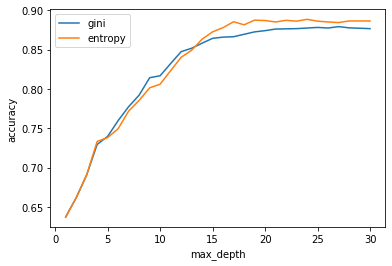

In [25]:
trees = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                     'acc_entropy':pd.Series(acc_entropy),
                     'max_depth':pd.Series(max_depth)})

plt.plot('max_depth', 'acc_gini', data=trees, label='gini')
plt.plot('max_depth', 'acc_entropy', data=trees, label='entropy')
#plt.vlines(6, 0.895, 0.915)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [26]:
# Train the decision tree using the identified hyperparameters
modelDT = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=21)
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')

In [27]:
# Use the trained tree to predict the testing data
dt_pred = modelDT.predict(X_test)
dt_pred_prob = modelDT.predict_proba(X_test)
#print(type(dt_pred_prob))

In [28]:
# Run this block for model evaluation 
#from sklearn import metrics
print("Model Metrics")
print("Accuracy:", metrics.accuracy_score(y_test, dt_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test, dt_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test, dt_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test, dt_pred, pos_label = 0))

Model Metrics
Accuracy: 0.8886316872427984
Balanced accuracy: 0.8927945301542777
Precision score for "Yes" 0.9364386220281417
Recall score for "No" 0.9208937198067633


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, dt_pred))

[[1525  131]
 [ 302 1930]]


In [30]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       False       0.83      0.92      0.88      1656
        True       0.94      0.86      0.90      2232

    accuracy                           0.89      3888
   macro avg       0.89      0.89      0.89      3888
weighted avg       0.89      0.89      0.89      3888



In [31]:
importances = modelDT.feature_importances_
#std = np.std([tree.feature_importances_ for tree in modelDT.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[f], importances[indices[f]]))

Feature ranking:
1. feature UGDS (0.135399)
2. feature CONTROL (0.094133)
3. feature INEXPFTE (0.088319)
4. feature UG25abv (0.088138)
5. feature TUITFTE (0.080195)
6. feature WDRAW_ORIG_YR4_RT (0.078157)
7. feature DEBT_MDN (0.074085)
8. feature Cost (0.065032)
9. feature Complete (0.060034)
10. feature COMP_ORIG_YR4_RT (0.058083)
11. feature NUMBRANCH (0.050853)
12. feature RetentionFT (0.049915)
13. feature PFTFAC (0.034171)
14. feature ENRL_ORIG_YR4_RT (0.029694)
15. feature PREDDEG (0.013791)


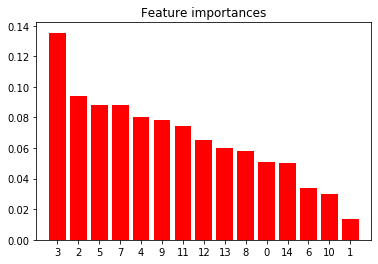

In [32]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center") #yerr=std[indices]
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

CONTROL and UGDS are the most prominent features - that predict open schools. (Control is categorical, so I'm not exactly sure how to interpret it). More enrollment increases prediction of being open.

## Decision Tree Model with various thresholds

In [33]:
threshold = []
accurate=[]
balance_acc = []
pred_proba = []

for thresh in range(50, 100, 5):
    new_pred = []
    for i in range(0, len(dt_pred_prob)):
        # print(len(dt_pred_prob))
        new_pred.append(dt_pred_prob[i, 1] > (thresh / 100.0))
    # print(new_pred)
    accurate.append(metrics.accuracy_score(y_test, new_pred))
    balance_acc.append(metrics.balanced_accuracy_score(y_test, new_pred))
    threshold.append(thresh)
    pred_proba.append(new_pred)

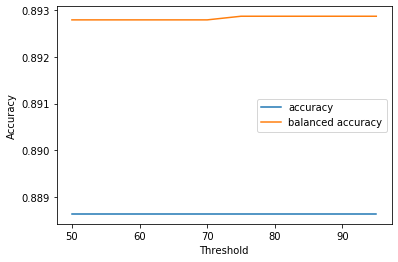

In [34]:
rate = pd.DataFrame({'threshold':pd.Series(threshold),
                     'accuracy':pd.Series(accurate),
                     'balance_acc':pd.Series(balance_acc)})

plt.plot('threshold', 'accuracy', data=rate, label='accuracy')
plt.plot('threshold', 'balance_acc', data=rate, label='balanced accuracy')
#plt.vlines(6, 0.895, 0.915)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
print("Balance Accuracy: ", max(balance_acc))
idx = balance_acc.index(max(balance_acc))
print("Threshold: ", threshold[idx])

Balance Accuracy:  0.8928724481845098
Threshold:  75


## AdaBoost model

In [36]:
ABmax_depth = []
score_a = []
score_b = []

for i in range(105, 131, 1):
    atree = AdaBoostClassifier(n_estimators=i, random_state=21)
    atree.fit(X_train, y_train)
    apredict = gtree.predict(X_test)
    score_a.append(metrics.accuracy_score(y_test, apredict))
    ##
    btree = AdaBoostClassifier(modelDT, n_estimators=i, random_state=21)
    btree.fit(X_train, y_train)
    bpredict = btree.predict(X_test)
    score_b.append(metrics.accuracy_score(y_test, bpredict))
    ##
    ABmax_depth.append(i)

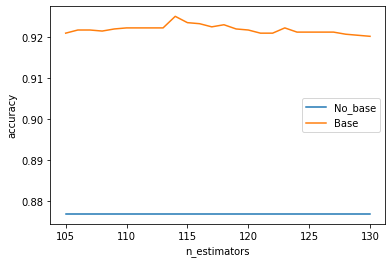

In [37]:
adatrees = pd.DataFrame({'score_a':pd.Series(score_a),
                     'score_b':pd.Series(score_b),
                     'n_estimators':pd.Series(ABmax_depth)})

plt.plot('n_estimators', 'score_a', data=adatrees, label='No_base')
plt.plot('n_estimators', 'score_b', data=adatrees, label='Base')
#plt.vlines(6, 0.895, 0.915)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [38]:
ideal_estimators = max(score_b)
idx = score_b.index(ideal_estimators)
print(ABmax_depth[idx])

114


In [39]:
modelAB = AdaBoostClassifier(modelDT, n_estimators=ABmax_depth[idx], random_state=21)
modelAB.fit(X_train, y_train)
AB_pred = modelAB.predict(X_test)
print(metrics.accuracy_score(y_test, AB_pred))

0.9251543209876543


In [40]:
print(confusion_matrix(y_test, AB_pred))

[[1536  120]
 [ 171 2061]]


In [41]:
print(classification_report(y_test, AB_pred))

              precision    recall  f1-score   support

       False       0.90      0.93      0.91      1656
        True       0.94      0.92      0.93      2232

    accuracy                           0.93      3888
   macro avg       0.92      0.93      0.92      3888
weighted avg       0.93      0.93      0.93      3888



In [42]:
importances = modelAB.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelAB.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[f], importances[indices[f]]))

Feature ranking:
1. feature RetentionFT (nan)
2. feature Cost (nan)
3. feature DEBT_MDN (nan)
4. feature ENRL_ORIG_YR4_RT (nan)
5. feature WDRAW_ORIG_YR4_RT (nan)
6. feature COMP_ORIG_YR4_RT (nan)
7. feature UG25abv (nan)
8. feature PFTFAC (nan)
9. feature INEXPFTE (nan)
10. feature TUITFTE (nan)
11. feature UGDS (nan)
12. feature PREDDEG (nan)
13. feature NUMBRANCH (nan)
14. feature CONTROL (-0.024307)
15. feature Complete (-0.055621)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:578: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


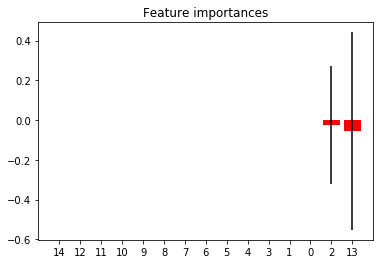

In [43]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Explore different threshold values for AB Model

In [44]:
AB_pred_prob = modelAB.predict_proba(X_test)

ABthreshold = []
ABaccurate=[]
ABbalance_acc = []
ABpred_proba = []

for thresh in range(50, 100, 5):
    new_pred = []
    for i in range(0, len(AB_pred_prob)):
        # print(len(dt_pred_prob))
        new_pred.append(AB_pred_prob[i, 1] > (thresh / 100.0))
    # print(new_pred)
    ABaccurate.append(metrics.accuracy_score(y_test, new_pred))
    ABbalance_acc.append(metrics.balanced_accuracy_score(y_test, new_pred))
    ABthreshold.append(thresh)
    ABpred_proba.append(new_pred)

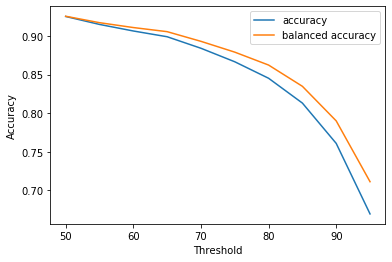

In [45]:
ABrate = pd.DataFrame({'threshold':pd.Series(ABthreshold),
                     'accuracy':pd.Series(ABaccurate),
                     'balance_acc':pd.Series(ABbalance_acc)})

plt.plot('threshold', 'accuracy', data=ABrate, label='accuracy')
plt.plot('threshold', 'balance_acc', data=ABrate, label='balanced accuracy')
#plt.vlines(6, 0.895, 0.915)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Exploration of misclassified schools

We are interested in predicting schools that might be in danger of closing. This would be schools that are currently open, but that the model predicts are closed. (These would be the "false negative" cases.) There are 224 schools in this class that could be explored further.

In [46]:
result_dict = {'CURROPER':y_test, 'Predicted':AB_pred}
results = pd.DataFrame(result_dict)
results.head()

,CURROPER,Predicted
29518,True,True
25278,True,True
26172,True,True
4329,False,False
25384,True,True


In [47]:
predicted = pd.concat([X_test, results], axis=1)
predicted.head()

,NUMBRANCH,PREDDEG,CONTROL,UGDS,TUITFTE,INEXPFTE,PFTFAC,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Cost,Complete,RetentionFT,CURROPER,Predicted
29518,4,1,3,172.0,11067.0,6322.0,0.4000,0.7151,0.558824,0.214286,0.000000,12417.0,26213.0,0.3636,0.6364,True,True
25278,1,1,3,270.0,5128.0,6008.0,0.4375,0.5444,0.446097,0.289963,0.000000,4857.0,15973.0,0.5523,0.6552,True,True
26172,1,2,3,557.0,9465.0,3661.0,0.3235,0.5673,0.414948,0.314433,0.018041,9500.0,22907.0,0.2300,0.6129,True,True
4329,1,1,3,129.0,7651.0,8874.0,0.4375,0.2479,0.576687,0.239264,0.000000,10885.0,38377.0,0.6124,0.6429,False,False
25384,1,2,1,3381.0,2635.0,5570.0,0.2457,0.2190,0.296157,0.247174,0.020231,5906.0,13481.0,0.3339,0.6095,True,True


In [48]:
false_pos = predicted.loc[(predicted.Predicted == True) & (predicted.CURROPER == False)]
false_pos.shape

(120, 17)

In [49]:
false_neg = predicted.loc[(predicted.Predicted==False) & (predicted.CURROPER==True)]
false_neg.shape

(171, 17)

## Generate graphs for the report

In [50]:
predicted['Result'] = np.nan
predicted.loc[(predicted.Predicted==True)&(predicted.CURROPER==True), 'Result'] = 'TP'
predicted.loc[(predicted.Predicted==False)&(predicted.CURROPER==False), 'Result'] = 'TN'
predicted.loc[(predicted.Predicted==True)&(predicted.CURROPER==False), 'Result'] = 'FP'
predicted.loc[(predicted.Predicted==False)&(predicted.CURROPER==True), 'Result'] = 'FN'
print(predicted.Result)

29518    TP
25278    TP
26172    TP
4329     TN
25384    TP
         ..
26843    TP
22649    TN
27248    TP
14348    TN
29292    TP
Name: Result, Length: 3888, dtype: object


In [51]:
to_graph1 = pd.merge(predicted, data)
to_graph = pd.merge(identity, to_graph1)
to_graph.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,CONTROL,UGDS,TUITFTE,INEXPFTE,PFTFAC,...,PCTFLOAN,Year,NetPrice,PREDDEG_N,CONTROL_N,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins,RetentionPT
0,00105200,university of alabama at birmingham,Birmingham,1,3,1,11200.0,9033.0,17208.0,0.9106,...,0.5397,2013,14805.0,Bachelor,Public,xl,high,highest,highest,0.5
1,00105200,university of alabama at birmingham,Birmingham,1,3,1,11200.0,9033.0,17208.0,0.9106,...,0.5397,2013,14805.0,Bachelor,Public,xl,high,highest,highest,0.5
2,00105200,university of alabama at birmingham,Birmingham,1,3,1,11200.0,9033.0,17208.0,0.9106,...,0.5397,2013,14805.0,Bachelor,Public,xl,high,highest,highest,0.5
3,00105200,university of alabama at birmingham,Birmingham,1,3,1,11200.0,9033.0,17208.0,0.9106,...,0.5397,2013,14805.0,Bachelor,Public,xl,high,highest,highest,0.5
4,00100800,athens state university,Athens,1,3,1,2999.0,5094.0,6176.0,0.4412,...,0.6277,2013,12601.0,Bachelor,Public,xl,med,high,high,NaN


In [52]:
to_graph.CONTROL = to_graph.CONTROL.astype('str')
to_graph.CONTROL.loc[to_graph.CONTROL == '1.0'] = 'Public'
to_graph.CONTROL.loc[to_graph.CONTROL == '2.0'] = 'NonProfit'
to_graph.CONTROL.loc[to_graph.CONTROL == '3.0'] = 'ForProfit'

to_graph.PREDDEG = to_graph.PREDDEG.astype('str')
to_graph.drop(['EnrollmentBins', 'TuitionBins', 'ExpenditureBins', 'FacultyBins'], axis=1, inplace=True)
to_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24492 entries, 0 to 24491
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OPEID              24492 non-null  object 
 1   INSTNM             24492 non-null  object 
 2   CITY               24492 non-null  object 
 3   NUMBRANCH          24492 non-null  int64  
 4   PREDDEG            24492 non-null  object 
 5   CONTROL            24492 non-null  object 
 6   UGDS               24492 non-null  float64
 7   TUITFTE            24492 non-null  float64
 8   INEXPFTE           24492 non-null  float64
 9   PFTFAC             24492 non-null  float64
 10  UG25abv            24492 non-null  float64
 11  COMP_ORIG_YR4_RT   24492 non-null  float64
 12  WDRAW_ORIG_YR4_RT  24492 non-null  float64
 13  ENRL_ORIG_YR4_RT   24492 non-null  float64
 14  DEBT_MDN           24492 non-null  float64
 15  Cost               24492 non-null  float64
 16  Complete           244

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
to_graph.duplicated().sum()

20861

In [54]:
to_graph.drop_duplicates(inplace=True)
to_graph.shape

(3631, 31)

In [55]:
print(confusion_matrix(to_graph['CURROPER'], to_graph['Predicted']))

[[1187   90]
 [ 175 2179]]


In [56]:
print(classification_report(to_graph['CURROPER'], to_graph['Predicted']))

              precision    recall  f1-score   support

       False       0.87      0.93      0.90      1277
        True       0.96      0.93      0.94      2354

    accuracy                           0.93      3631
   macro avg       0.92      0.93      0.92      3631
weighted avg       0.93      0.93      0.93      3631



In [57]:
degreeControl = to_graph.pivot_table(index='PREDDEG', columns=['CONTROL','CURROPER'], aggfunc='size')
print(degreeControl)

CONTROL      1            2             3       
CURROPER False  True  False  True   False  True 
PREDDEG                                         
0         18.0   32.0  20.0   63.0  100.0  163.0
1         59.0  178.0  71.0   50.0  693.0  714.0
2         21.0  215.0  13.0   52.0  114.0  175.0
3          3.0  167.0  43.0  375.0   72.0   78.0
4          NaN    4.0  20.0   79.0   30.0    9.0


In [58]:
predControl = to_graph.pivot_table(index='PREDDEG', columns=['CONTROL','Result'], aggfunc='size')
print(predControl)

CONTROL     1                       2                        3               \
Result     FN   FP    TN     TP    FN    FP    TN     TP    FN    FP     TN   
PREDDEG                                                                       
0         1.0  1.0  17.0   31.0   9.0   NaN  20.0   54.0   9.0   4.0   96.0   
1        11.0  3.0  56.0  167.0  12.0   6.0  65.0   38.0  97.0  51.0  642.0   
2         NaN  2.0  19.0  215.0   3.0   3.0  10.0   49.0  17.0   7.0  107.0   
3         NaN  2.0   1.0  167.0   7.0  11.0  32.0  368.0   6.0   NaN   72.0   
4         NaN  NaN   NaN    4.0   2.0   NaN  20.0   77.0   1.0   NaN   30.0   

CONTROL         
Result      TP  
PREDDEG         
0        154.0  
1        617.0  
2        158.0  
3         72.0  
4          8.0  


In [59]:
controlPivot = to_graph.pivot_table(index='CONTROL_N', columns = 'Result', aggfunc='size')
print(controlPivot)

Result               FN  FP   TN    TP
CONTROL_N                             
Private for-profit  130  62  947  1009
Private nonprofit    33  20  147   586
Public               12   8   93   584


In [60]:
false_neg = to_graph.loc[to_graph.Result == 'FN']
false_neg.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,CONTROL,UGDS,TUITFTE,INEXPFTE,PFTFAC,...,HIGHDEG,region,ADM_RATE,AVGFACSAL,PCTFLOAN,Year,NetPrice,PREDDEG_N,CONTROL_N,RetentionPT
369,02272400,eastern college of health vocations-little rock,Little Rock,2,1,3,302.0,5255.0,1403.0,0.4375,...,1,5.0,NaN,NaN,0.9182,2013,12460.0,Certificate,Private for-profit,NaN
569,02332813,cet-salinas,Salinas,17,1,2,65.0,8824.0,6371.0,0.6104,...,1,8.0,NaN,NaN,0.0577,2013,12479.0,Certificate,Private nonprofit,NaN
707,01298500,hair california beauty academy,Orange,1,1,3,47.0,3624.0,330.0,0.4375,...,1,8.0,NaN,NaN,0.0000,2013,7304.0,Certificate,Private for-profit,0.6667
1309,02054900,marinello schools of beauty-lake forest,Lake Forest,3,1,3,567.0,12077.0,5459.0,0.4375,...,1,8.0,NaN,NaN,0.7564,2013,14808.0,Certificate,Private for-profit,0.7368
1492,02117500,naropa university,Boulder,1,3,2,380.0,20723.0,8926.0,0.3171,...,4,7.0,0.7975,6373.0,0.5821,2013,25942.0,Bachelor,Private nonprofit,0.3333


## UGDS - Undergraduate enrollment

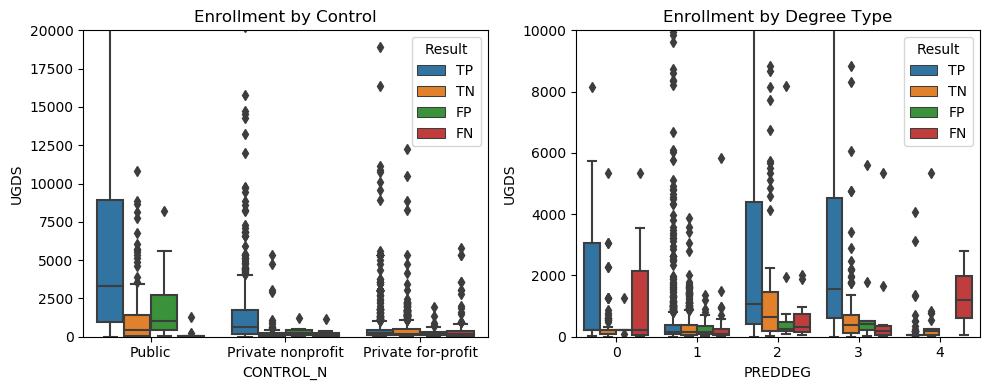

In [61]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL_N', 'UGDS', data = to_graph, hue = 'Result')
plt.ylim(0, 20000)
plt.title('Enrollment by Control')

plt.subplot(1, 2, 2)
sns.boxplot('PREDDEG', 'UGDS', data = to_graph, hue = 'Result')
plt.ylim(0, 10000)
plt.title('Enrollment by Degree Type')
plt.tight_layout()

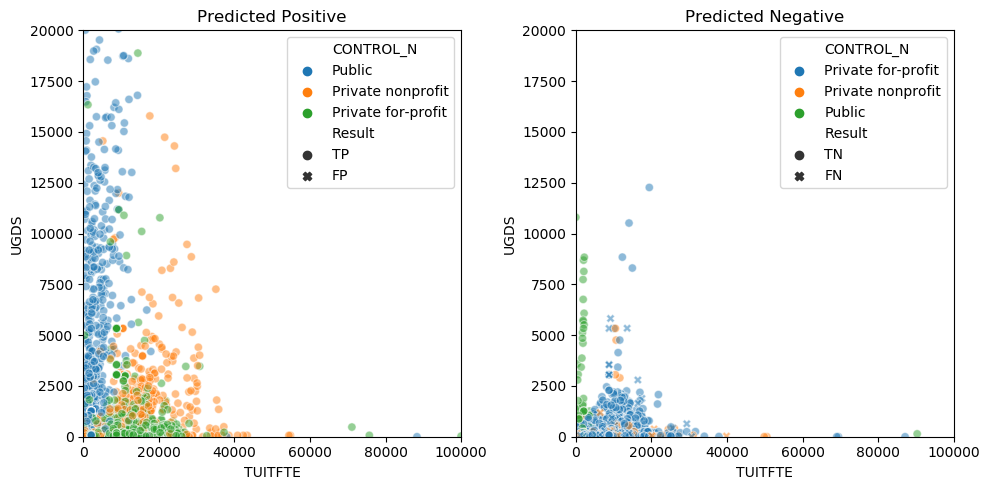

In [62]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==True], hue = 'CONTROL_N',style='Result', alpha=0.5 )
plt.title('Predicted Positive')
plt.xlim(0,100000)
plt.ylim(0,20000)

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==False], hue = 'CONTROL_N', style='Result', alpha=0.5)
plt.title('Predicted Negative')
plt.xlim(0,100000)
plt.ylim(0,20000)
plt.tight_layout()
#plt.show()
plt.savefig('../figures/TuitionEnrollmentResultsControl.png',bbox_inches='tight')

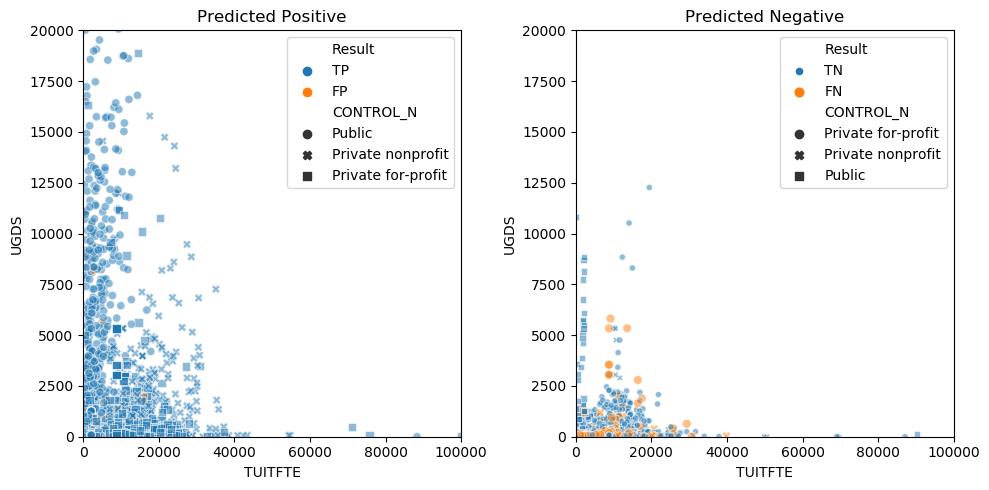

In [63]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==True], hue='Result',style='CONTROL_N', alpha=0.5 )
plt.title('Predicted Positive')
plt.xlim(0,100000)
plt.ylim(0,20000)

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==False], hue='Result', style='CONTROL_N',size='Result', sizes={20,40}, alpha=0.5)
plt.title('Predicted Negative')
plt.xlim(0,100000)
plt.ylim(0,20000)
plt.tight_layout()
#plt.show()
plt.savefig('../figures/TuitionEnrollmentResults.png',bbox_inches='tight')

## Tuition and Cost

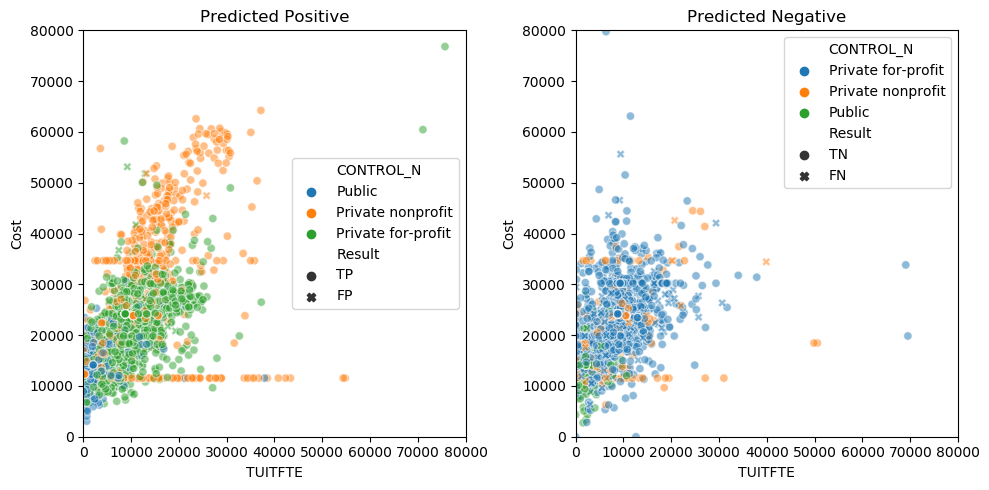

In [64]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==True], hue ='CONTROL_N', style='Result', alpha=0.5)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==False], hue = 'CONTROL_N', style='Result', alpha=0.5)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.title('Predicted Negative')
plt.tight_layout()
plt.savefig('../figures/TuitionCostResultsControl.png',bbox_inches='tight')

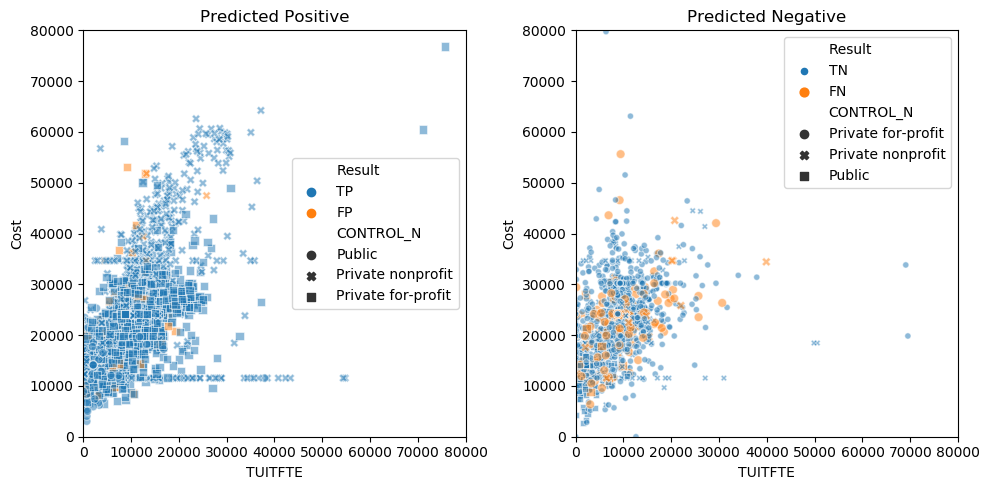

In [65]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==True], hue ='Result', style='CONTROL_N', alpha=0.5)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==False], hue = 'Result', style='CONTROL_N',size='Result', sizes={20,40}, alpha=0.5)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.title('Predicted Negative')
plt.tight_layout()
plt.savefig('../figures/TuitionCostResults.png',bbox_inches='tight')

## Cost and Debt

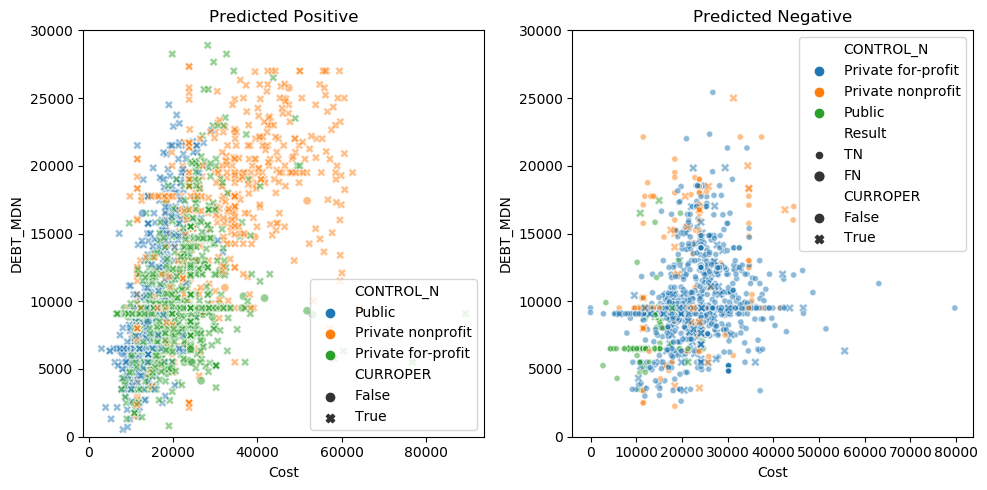

In [66]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Predicted==True], hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.title('Predicted Positive')
plt.ylim(0,30000)

plt.subplot(1, 2, 2)
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Predicted==False], hue='CONTROL_N', style='CURROPER',size='Result', sizes={20,40}, alpha=0.5) #, label='True')
plt.title('Predicted Negative')
plt.ylim(0,30000)
plt.tight_layout()

#plt.show()
plt.savefig('../figures/CostDebtResultsControl.png',bbox_inches='tight')

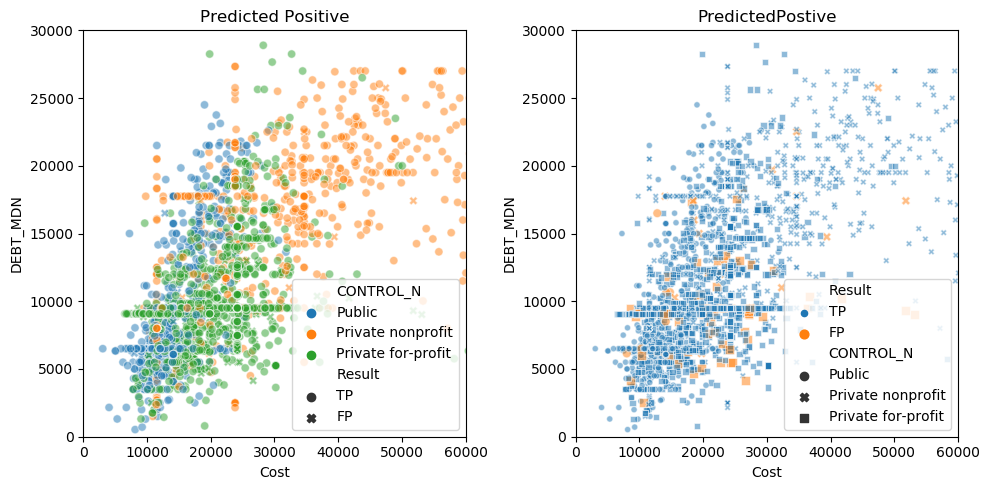

In [67]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Predicted==True], hue='CONTROL_N', style='Result', alpha=0.5)
plt.title('Predicted Positive')
plt.ylim(0,30000)
plt.xlim(0,60000)

plt.subplot(1, 2, 2)
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Predicted==True], hue='Result', style='CONTROL_N',size='Result', sizes={20,40}, alpha=0.5)
plt.title('PredictedPostive')
plt.ylim(0,30000)
plt.xlim(0,60000)
plt.tight_layout()
#plt.show()
plt.savefig('../figures/TuitionCostResultsPositive.png',bbox_inches='tight')

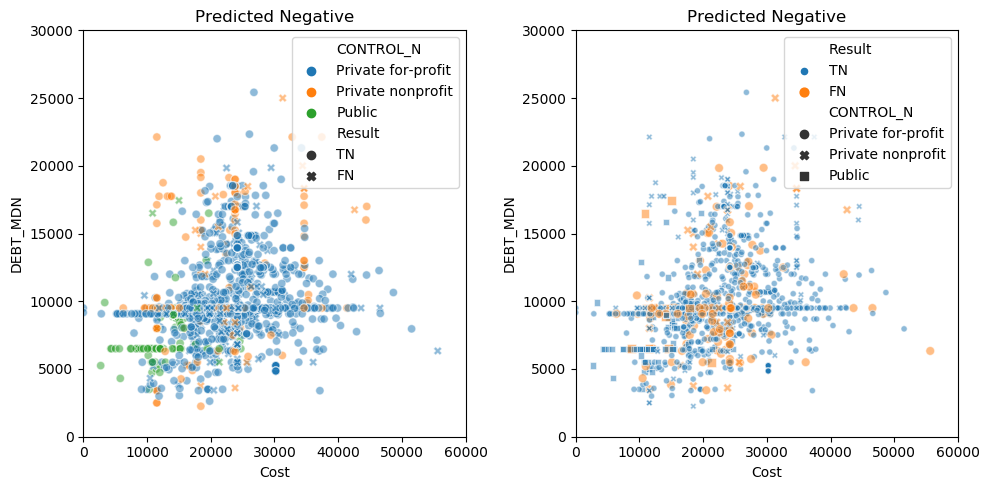

<Figure size 432x288 with 0 Axes>

In [68]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Predicted==False], hue='CONTROL_N', style='Result', alpha=0.5)
plt.title('Predicted Negative')
plt.ylim(0,30000)
plt.xlim(0,60000)

plt.subplot(1, 2, 2)
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Predicted==False], hue='Result', style='CONTROL_N', size='Result', sizes={20,40}, alpha=0.5)
plt.title('Predicted Negative')
plt.ylim(0,30000)
plt.xlim(0,60000)
plt.tight_layout()
plt.show()
plt.savefig('../figures/TuitionCostResultsNegative.png',bbox_inches='tight')

## NumBranch

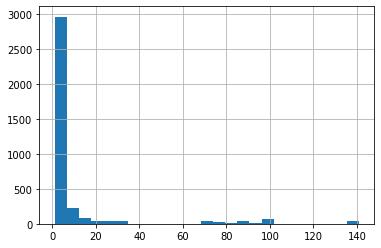

In [69]:
to_graph.NUMBRANCH.hist(bins=25)

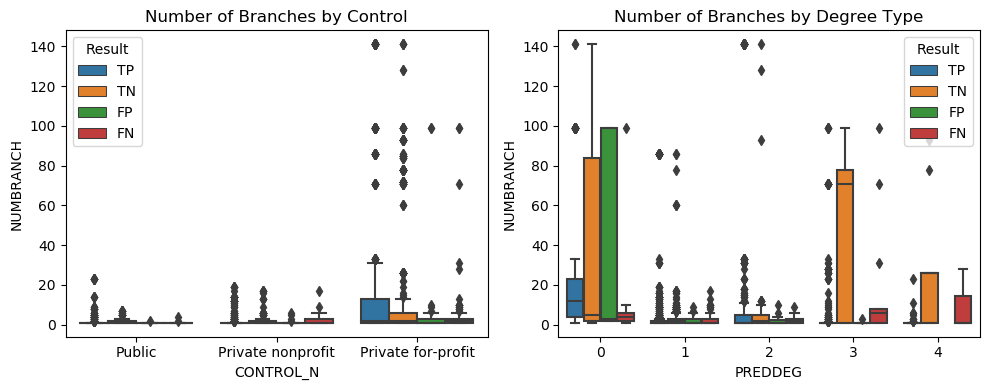

In [70]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL_N', 'NUMBRANCH', data = to_graph, hue = 'Result')
#plt.ylim(0, 100)
plt.title('Number of Branches by Control')

plt.subplot(1, 2, 2)
sns.boxplot('PREDDEG', 'NUMBRANCH', data = to_graph, hue = 'Result')
#plt.ylim(0, 100)
plt.title('Number of Branches by Degree Type')
plt.tight_layout()
plt.show()

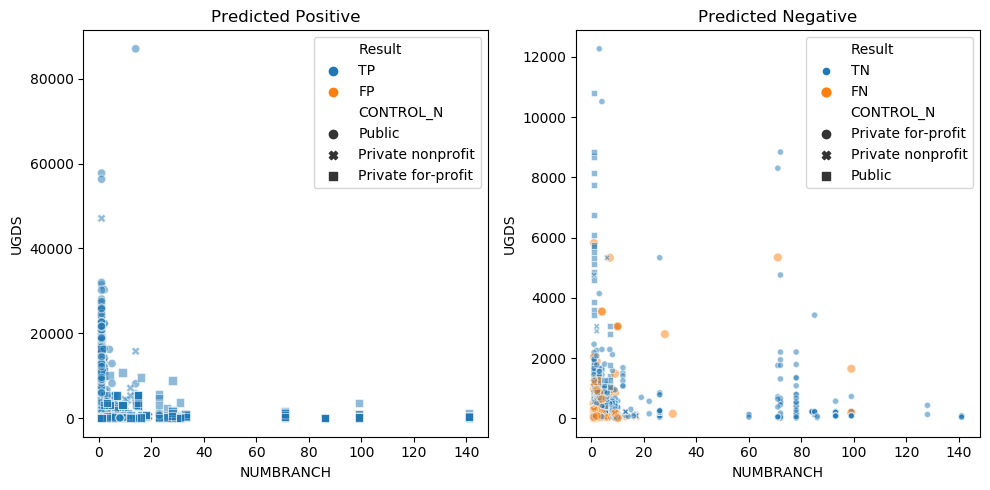

<Figure size 432x288 with 0 Axes>

In [71]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('NUMBRANCH', 'UGDS', data=to_graph.loc[to_graph.Predicted==True], hue='Result', style='CONTROL_N', alpha=0.5)
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
sns.scatterplot('NUMBRANCH', 'UGDS', data=to_graph.loc[to_graph.Predicted==False], hue='Result', style='CONTROL_N',size='Result', sizes={20,40}, alpha=0.5)
plt.title('Predicted Negative')
plt.tight_layout()
plt.show()
plt.savefig('../figures/NumBranchUGDSResults.png',bbox_inches='tight')

## Instructional Expenditure

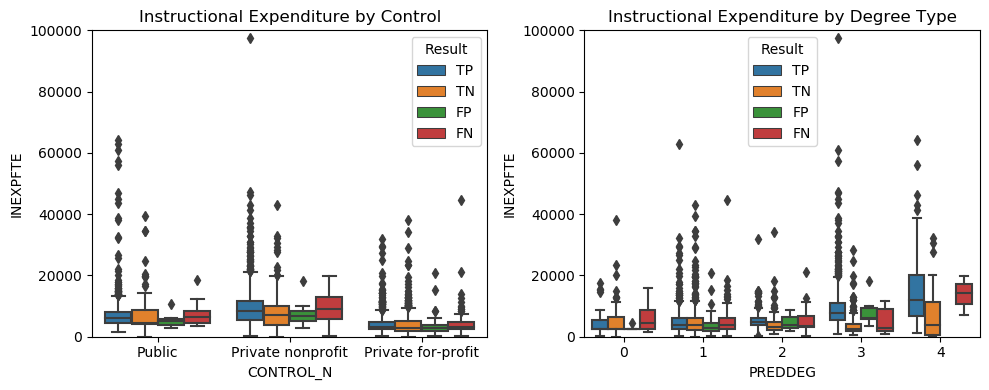

In [72]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL_N', 'INEXPFTE', data = to_graph, hue = 'Result')
plt.ylim(0, 100000)
plt.title('Instructional Expenditure by Control')

plt.subplot(1, 2, 2)
sns.boxplot('PREDDEG', 'INEXPFTE', data = to_graph, hue = 'Result')
plt.ylim(0, 100000)
plt.title('Instructional Expenditure by Degree Type')
plt.tight_layout()
plt.show()

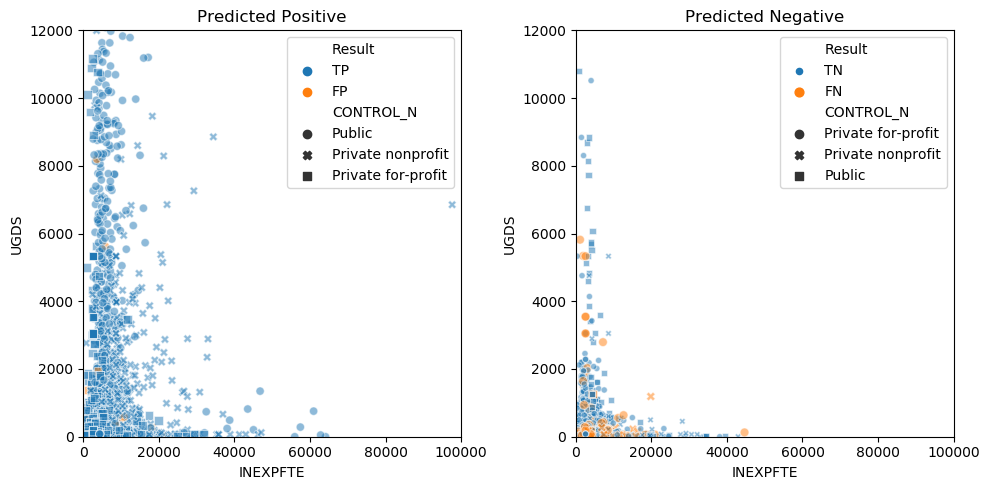

In [73]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
#sns.scatterplot('', 'UGDS', data=to_graph, hue = 'Result')
sns.scatterplot('INEXPFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==True], hue='Result', style='CONTROL_N', alpha=0.5)
plt.xlim(0, 100000)
plt.ylim(0, 12000)
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
#sns.scatterplot('INEXPFTE', 'UGDS', data=to_graph.loc[to_graph.Result=='FN'], hue = 'CONTROL')
sns.scatterplot('INEXPFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==False], hue='Result', style='CONTROL_N',size='Result', sizes={20,40}, alpha=0.5)
plt.xlim(0, 100000)
plt.ylim(0, 12000)
plt.title('Predicted Negative')
plt.tight_layout()
#plt.show()
plt.savefig('../figures/ExpenditureUGDSResults.png',bbox_inches='tight')

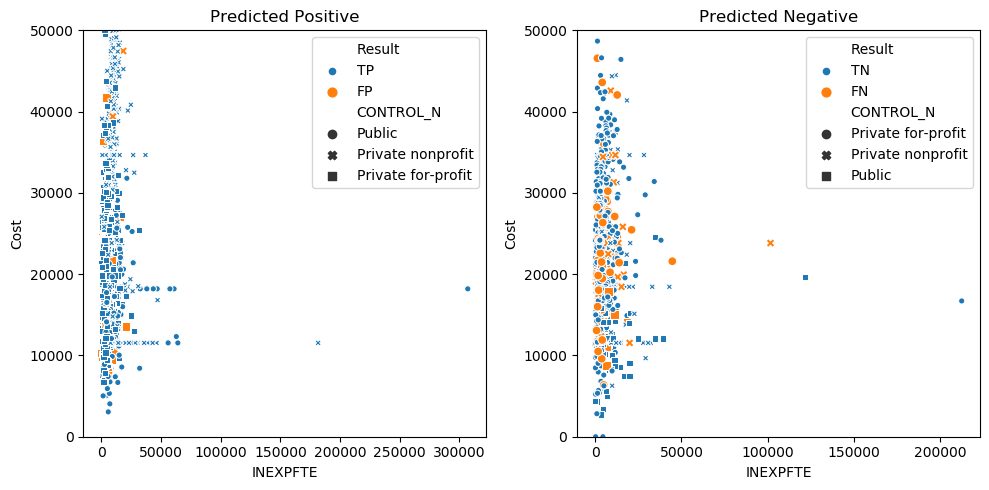

In [74]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('INEXPFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==True], hue='Result', style='CONTROL_N',size='Result', sizes={20,40})#, alpha=0.5)
plt.ylim(0, 50000)
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
sns.scatterplot('INEXPFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==False], hue = 'Result', style='CONTROL_N', size='Result', sizes={20,40})
plt.ylim(0, 50000)
plt.title('Predicted Negative')
plt.tight_layout()
#plt.show()
plt.savefig('../figures/ExpenditureCostResultsPositive.png',bbox_inches='tight')

In [75]:
## Graphs of just 4yr bachelors institutions

In [76]:
bach = to_graph.loc[to_graph['PREDDEG']=='3']
bach.shape

(738, 31)

In [77]:
bach.columns

Index(['OPEID', 'INSTNM', 'CITY', 'NUMBRANCH', 'PREDDEG', 'CONTROL', 'UGDS',
       'TUITFTE', 'INEXPFTE', 'PFTFAC', 'UG25abv', 'COMP_ORIG_YR4_RT',
       'WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT', 'DEBT_MDN', 'Cost', 'Complete',
       'RetentionFT', 'CURROPER', 'Predicted', 'Result', 'HIGHDEG', 'region',
       'ADM_RATE', 'AVGFACSAL', 'PCTFLOAN', 'Year', 'NetPrice', 'PREDDEG_N',
       'CONTROL_N', 'RetentionPT'],
      dtype='object')

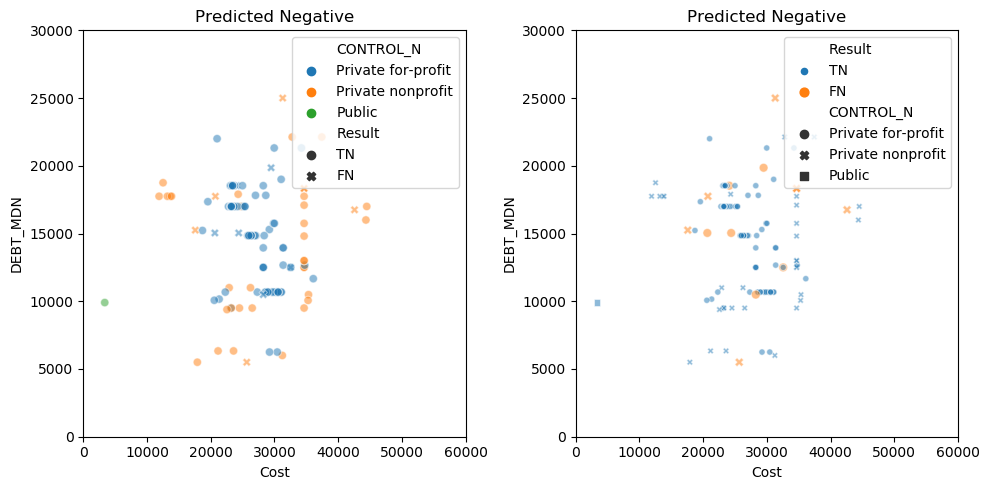

<Figure size 432x288 with 0 Axes>

In [78]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Cost', 'DEBT_MDN', data=bach[bach.Predicted==False], hue='CONTROL_N', style='Result', alpha=0.5)
plt.title('Predicted Negative')
plt.ylim(0,30000)
plt.xlim(0,60000)

plt.subplot(1, 2, 2)
sns.scatterplot('Cost', 'DEBT_MDN', data=bach.loc[bach.Predicted==False], hue='Result', style='CONTROL_N', size='Result', sizes={20,40}, alpha=0.5)
plt.title('Predicted Negative')
plt.ylim(0,30000)
plt.xlim(0,60000)
plt.tight_layout()
plt.show()
plt.savefig('../figures/BachTuitionCostResultsNegative.png',bbox_inches='tight')

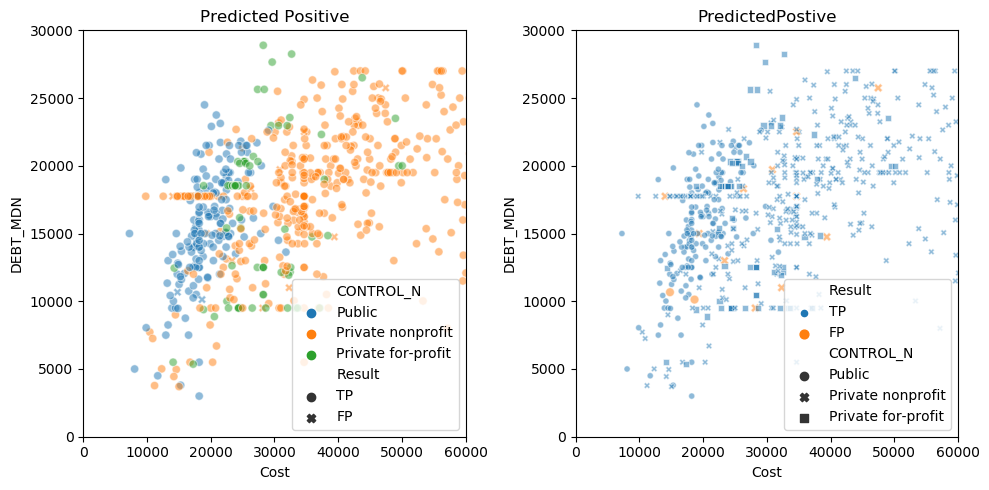

In [79]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Cost', 'DEBT_MDN', data=bach.loc[bach.Predicted==True], hue='CONTROL_N', style='Result', alpha=0.5)
plt.title('Predicted Positive')
plt.ylim(0,30000)
plt.xlim(0,60000)

plt.subplot(1, 2, 2)
sns.scatterplot('Cost', 'DEBT_MDN', data=bach.loc[bach.Predicted==True], hue='Result', style='CONTROL_N',size='Result', sizes={20,40}, alpha=0.5)
plt.title('PredictedPostive')
plt.ylim(0,30000)
plt.xlim(0,60000)
plt.tight_layout()
#plt.show()
plt.savefig('../figures/BachTuitionCostResultsPositive.png',bbox_inches='tight')

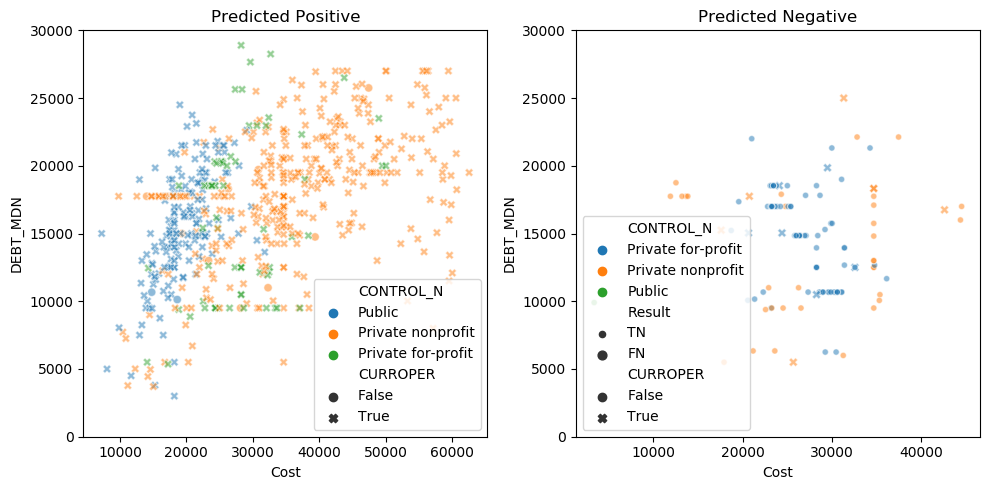

In [80]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('Cost', 'DEBT_MDN', data=bach.loc[bach.Predicted==True], hue='CONTROL_N', style='CURROPER', alpha=0.5)
plt.title('Predicted Positive')
plt.ylim(0,30000)

plt.subplot(1, 2, 2)
sns.scatterplot('Cost', 'DEBT_MDN', data=bach.loc[bach.Predicted==False], hue='CONTROL_N', style='CURROPER',size='Result', sizes={20,40}, alpha=0.5) #, label='True')
plt.title('Predicted Negative')
plt.ylim(0,30000)
plt.tight_layout()

#plt.show()
plt.savefig('../figures/BachCostDebtResultsControl.png',bbox_inches='tight')

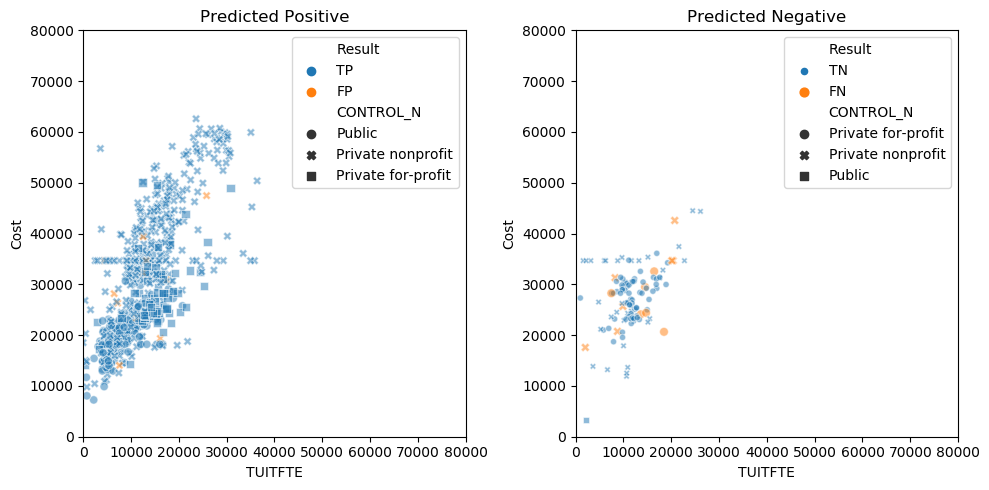

In [81]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'Cost', data=bach.loc[bach.Predicted==True], hue ='Result', style='CONTROL_N', alpha=0.5)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'Cost', data=bach.loc[bach.Predicted==False], hue = 'Result', style='CONTROL_N',size='Result', sizes={20,40}, alpha=0.5)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.title('Predicted Negative')
plt.tight_layout()
plt.savefig('../figures/BachTuitionCostResults.png',bbox_inches='tight')

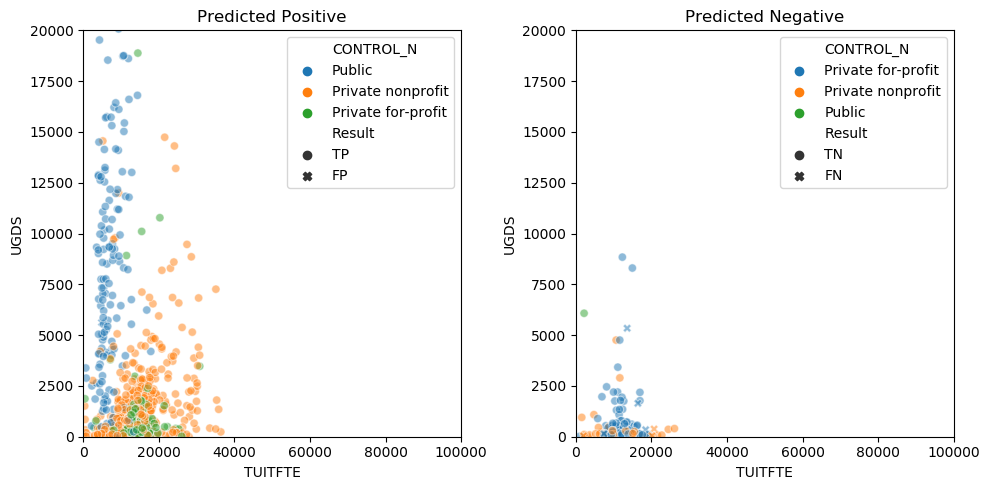

In [82]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'UGDS', data=bach.loc[bach.Predicted==True], hue = 'CONTROL_N',style='Result', alpha=0.5 )
plt.title('Predicted Positive')
plt.xlim(0,100000)
plt.ylim(0,20000)

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'UGDS', data=bach.loc[bach.Predicted==False], hue = 'CONTROL_N', style='Result', alpha=0.5)
plt.title('Predicted Negative')
plt.xlim(0,100000)
plt.ylim(0,20000)
plt.tight_layout()
#plt.show()
plt.savefig('../figures/BachTuitionEnrollmentResultsControl.png',bbox_inches='tight')

## Explore predictions of various schools

In [83]:
bethel = to_graph.loc[to_graph['INSTNM'].str.startswith('bethel')]
bethel.shape

(3, 31)

In [84]:
bethel.CURROPER.value_counts()

True    3
Name: CURROPER, dtype: int64

In [85]:
bethel.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,CONTROL,UGDS,TUITFTE,INEXPFTE,PFTFAC,...,HIGHDEG,region,ADM_RATE,AVGFACSAL,PCTFLOAN,Year,NetPrice,PREDDEG_N,CONTROL_N,RetentionPT
3273,00190500,bethel college-north newton,North Newton,1,3,2,482.0,11915.0,7880.0,0.7778,...,3,4.0,0.6440,5407.0,0.7420,2013,18539.0,Bachelor,Private nonprofit,NaN
7351,00348000,bethel university,McKenzie,1,3,2,5063.0,8975.0,7006.0,1.0000,...,4,5.0,0.5103,3935.0,0.7765,2013,17459.0,Bachelor,Private nonprofit,0.0882
19035,04153800,bethel college,Hampton,1,3,2,54.0,4307.0,2005.0,0.6726,...,3,5.0,1.0000,NaN,0.7612,2013,10863.0,Bachelor,Private nonprofit,0.0000


In [86]:
taylorIN = data.loc[data['INSTNM'].str.startswith('taylor')]
taylorIN.shape

(7, 33)

In [87]:
taylorIN.head(7)

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,Cost,PREDDEG_N,CONTROL_N,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins,Complete,RetentionFT,RetentionPT
23742,03100800,taylor technical institute,Perry,1,1,1,1,5.0,NaN,58.0,...,11854.0,Certificate,Public,small,med,highest,NaN,0.3425,0.7619,0.200
24050,01181000,taylor business institute,Chicago,1,2,2,3,3.0,1.000,86.0,...,23100.0,Associates,Private for-profit,small,high,med,low,0.5078,0.6400,NaN
24142,00183800,taylor university,Upland,1,3,4,2,3.0,0.876,1873.0,...,38845.0,Bachelor,Private nonprofit,large,highest,high,high,0.7415,0.8936,NaN
27317,02209200,taylortown school of beauty inc,Taylor,1,1,1,3,3.0,NaN,204.0,...,16085.0,Certificate,Private for-profit,medium,low,low,NaN,1.0000,0.6538,NaN
28956,04116600,taylor college,Belleview,1,2,2,3,5.0,NaN,234.0,...,22262.0,Associates,Private for-profit,medium,med,low,high,0.9333,0.8261,NaN
29734,Other,taylor andrews academy of hair design-west jordan,West Jordan,1,1,1,3,7.0,NaN,175.0,...,13507.0,Certificate,Private for-profit,medium,highest,low,NaN,0.6818,0.6923,0.875
29776,Other,taylor andrews academy-st george,St. George,1,1,1,3,7.0,NaN,120.0,...,13481.0,Certificate,Private for-profit,small,med,low,NaN,0.9167,0.7119,0.550


In [88]:
indiana = data.loc[data['INSTNM'].str.startswith('indiana university')]
indiana.shape

(9, 33)

In [89]:
indiana.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,Cost,PREDDEG_N,CONTROL_N,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins,Complete,RetentionFT,RetentionPT
24091,00182800,indiana university-purdue university-fort wayne,Fort Wayne,1,3,4,1,3.0,0.8309,9795.0,...,18837.0,Bachelor,Public,xl,med,high,high,0.2594,0.6719,0.5000
24092,00181300,indiana university-purdue university-indianapolis,Indianapolis,1,3,4,1,3.0,0.6958,21569.0,...,20846.0,Bachelor,Public,xl,highest,highest,high,0.4161,0.7195,0.5331
24098,00181400,indiana university-kokomo,Kokomo,1,3,4,1,3.0,0.7355,2708.0,...,15874.0,Bachelor,Public,xl,med,med,med,0.2756,0.6086,0.3953
24099,00181600,indiana university-south bend,South Bend,1,3,4,1,3.0,0.7003,5538.0,...,17377.0,Bachelor,Public,xl,med,high,med,0.2580,0.6346,0.5128
24100,00180900,indiana university-bloomington,Bloomington,1,3,4,1,3.0,0.7217,31984.0,...,23043.0,Bachelor,Public,xl,highest,highest,highest,0.7705,0.8982,0.7941


In [90]:
dangerBachPrivate = bach.loc[(bach['CONTROL']=='2') & (bach['Result']=='FN')]
dangerBachPrivate.shape

(7, 31)

In [91]:
dangerBachPrivate.head(7)

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,CONTROL,UGDS,TUITFTE,INEXPFTE,PFTFAC,...,HIGHDEG,region,ADM_RATE,AVGFACSAL,PCTFLOAN,Year,NetPrice,PREDDEG_N,CONTROL_N,RetentionPT
1492,02117500,naropa university,Boulder,1,3,2,380.0,20723.0,8926.0,0.3171,...,4,7.0,0.7975,6373.0,0.5821,2013,25942.0,Bachelor,Private nonprofit,0.3333
4862,03043100,thomas more college of liberal arts,Merrimack,1,3,2,80.0,8252.0,10655.0,1.0000,...,3,1.0,NaN,4307.0,0.6737,2013,18882.0,Bachelor,Private nonprofit,NaN
14104,03513500,williamson christian college,Franklin,1,3,2,72.0,8752.0,2393.0,0.2500,...,3,5.0,NaN,500.0,0.4156,2013,15874.0,Bachelor,Private nonprofit,NaN
15153,03855300,ecclesia college,Springdale,1,3,2,175.0,9885.0,5650.0,0.3590,...,3,5.0,0.3074,1000.0,0.5060,2013,17801.0,Bachelor,Private nonprofit,0.6154
23627,03092600,messenger college,Euless,1,3,2,47.0,2018.0,1881.0,0.0714,...,3,6.0,0.7619,2834.0,0.7000,2013,13565.0,Bachelor,Private nonprofit,1.0000
24123,Other,liu brentwood,Brentwood,6,3,2,23.0,20397.0,9806.0,0.3864,...,4,2.0,NaN,11481.0,0.8000,2013,19764.5,Bachelor,Private nonprofit,NaN
24278,Other,liu riverhead,Riverhead,6,3,2,56.0,20121.0,11601.0,0.2188,...,4,2.0,NaN,9735.0,0.7843,2013,19764.5,Bachelor,Private nonprofit,NaN


In [92]:
# Naropa still in operation (at least they still have an active website)
# Thomas More still in operation
# Williamson Christian still in operation
# Ecclesia still open
# Messenger still open
# LIU = Long island university - Brentwood still open, Riverhead still open